In [274]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.metrics import mean_squared_error

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [275]:
from datetime import datetime

from binance.client import Client

api_key = ""
secret_key = ""

client = Client(api_key, secret_key)

In [276]:
candles = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1MINUTE)

In [277]:
len(candles)

500

In [278]:
candles[0], candles[1] #time-open-high-low-close-volume-close_time

([1607298060000,
  '19351.19000000',
  '19359.72000000',
  '19348.26000000',
  '19355.00000000',
  '17.70419200',
  1607298119999,
  '342614.76437356',
  458,
  '13.12361500',
  '253969.92210086',
  '0'],
 [1607298120000,
  '19355.00000000',
  '19358.00000000',
  '19344.14000000',
  '19348.21000000',
  '34.87098900',
  1607298179999,
  '674810.69737751',
  581,
  '18.10324100',
  '350352.89592295',
  '0'])

In [279]:
price = np.array([float(candles[i][4]) for i in range(500)])

In [280]:
time = np.array([int(candles[i][0]) for i in range(500)])
t = np.array([datetime.fromtimestamp(time[i]/1000).strftime('%H:%M:%S') for i in range(500)])

In [281]:
price.shape

(500,)

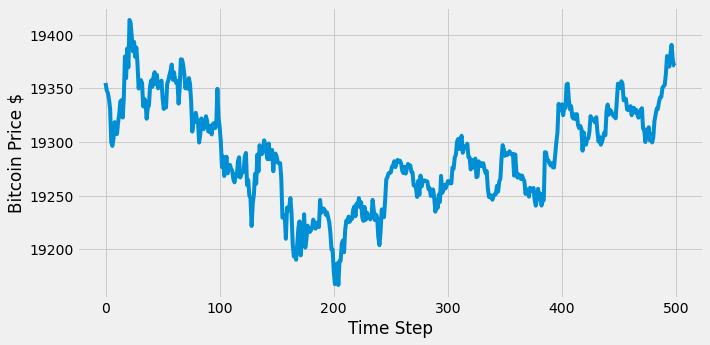

In [282]:
plt.figure(figsize=(10,5))
plt.xlabel("Time Step")
plt.ylabel("Bitcoin Price $")
plt.plot(price)

In [283]:
timeframe = pd.DataFrame({'Time':t, 'Price $BTC':price})
timeframe #minute by minute price

,Time,Price $BTC
0,08:41:00,19355.00
1,08:42:00,19348.21
2,08:43:00,19345.76
3,08:44:00,19340.10
4,08:45:00,19330.82
...,...,...
495,16:56:00,19382.39
496,16:57:00,19390.48
497,16:58:00,19377.40
498,16:59:00,19371.30


In [284]:
price = price.reshape(500,1)

In [285]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [286]:
scaler.fit(price[:374])
normalized_price = scaler.transform(price)

In [287]:
df = pd.DataFrame(normalized_price.reshape(100,5),columns=['First','Second','Third','Fourth','Target'])

In [288]:
df.tail()

,First,Second,Third,Fourth,Target
95,0.655044,0.720971,0.464542,0.591612,0.426899
96,0.529845,0.843466,0.964921,1.081177,1.073898
97,1.216774,1.295387,1.305162,1.484017,1.513965
98,1.536218,1.748556,2.097532,2.056146,1.893928
99,2.147445,2.315694,2.043667,1.916805,1.905159


In [289]:
#Train Test Split

In [290]:
x_train = df.iloc[:74, :4]
y_train = df.iloc[:74, -1]

In [291]:
x_test = df.iloc[75:99,:4]
y_test = df.iloc[75:99,-1]

In [292]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [293]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [294]:
scaler.inverse_transform(y_test), y_test

(array([19256.48, 19245.99, 19280.  , 19288.36, 19331.  , 19353.5 ,
        19323.5 , 19315.97, 19308.9 , 19309.53, 19318.19, 19297.49,
        19328.67, 19326.68, 19354.34, 19338.85, 19330.52, 19327.48,
        19330.  , 19310.34, 19299.66, 19330.77, 19351.93, 19370.2 ]),
 array([-0.47112041, -0.68928222,  0.01802788,  0.19189181,  1.07868106,
         1.54661629,  0.92270265,  0.76610033,  0.61906468,  0.63216687,
         0.81226994,  0.38176953,  1.03022377,  0.9888375 ,  1.56408587,
         1.24193847,  1.06869845,  1.0054752 ,  1.05788394,  0.64901254,
         0.42689928,  1.07389773,  1.51396481,  1.89392822]))

In [295]:
model = Sequential()

model.add(LSTM(20, return_sequences=True, input_shape=(4,1)))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss = 'mse', optimizer = 'rmsprop')

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 4, 20)             1760      
_________________________________________________________________
lstm_15 (LSTM)               (None, 40)                9760      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 41        
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
_________________________________________________________________


In [296]:
model.fit(x_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
15/15 [==============================] - 0s 6ms/step - loss: 0.8244
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4469
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1696
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0985
Epoch 5/100
15/15 [==============================] - ETA: 0s - loss: 0.107 - 0s 6ms/step - loss: 0.0915
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0880
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0877
Epoch 8/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0862
Epoch 9/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0858
Epoch 10/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0916
Epoch 11/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0825
Epoch 12/100
15/15 [==============================] - ETA: 0s - loss: 0.089 - 0s 5ms/step - lo

In [297]:
y_pred = model.predict(x_test)

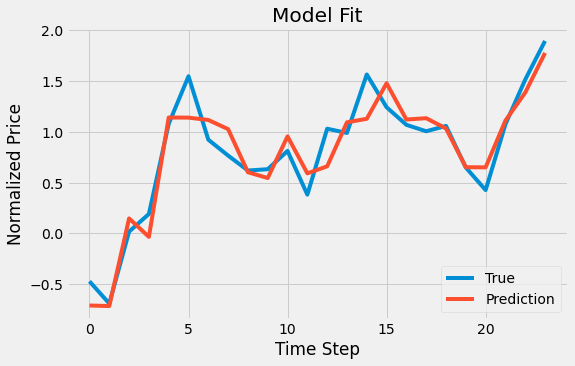

In [298]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price')
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Prediction')
plt.legend()

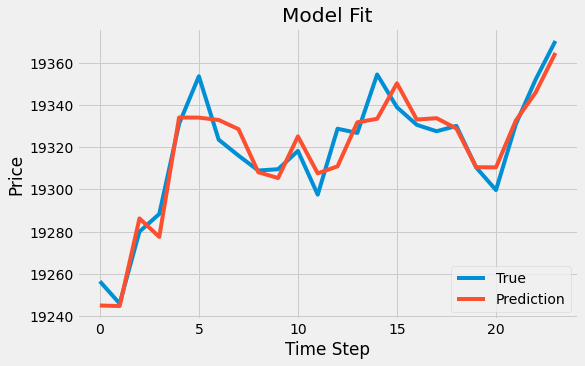

In [299]:
plt.figure(figsize=[8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(y_pred), label='Prediction')

plt.legend()

In [300]:
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred)))
print('Test Score : %.2f RMSE' %(testScore))

Test Score : 9.65 RMSE


In [301]:
from sklearn.metrics import r2_score

In [302]:
print('RSquared : ', '{:.2%}'.format(r2_score(y_test, y_pred)))

RSquared :  88.88%


In [303]:
#  Trading bot

In [304]:
check = client.get_klines(symbol='BTCUSDT', interval= Client.KLINE_INTERVAL_1MINUTE)

check[499]

[1607328060000,
 '19375.53000000',
 '19378.96000000',
 '19372.20000000',
 '19374.30000000',
 '2.86294800',
 1607328119999,
 '55473.53827990',
 56,
 '2.18402200',
 '42320.06633127',
 '0']

19358.656

In [307]:
symbol = 'BTSUSDT'
quantity = '0.05'

order = False

while True:
    price = client.get_recent_trades(symbol = symbol)
    candle = client.get_klines(symbol= symbol, interval = Client.KLINE_INTERVAL_1MINUTE)
    #candles = scaler.transform(np.array([float(candle[i][4]) for  i in index]).reshape(1,-1))
    GR = []
    for i in range(496,500):
        candles = scaler.transform(np.array([float(check[i][4])]).reshape(1,-1))
        GR.append(candles)
        

    normalized_GR = np.array(GR)
    model_feed = normalized_GR.reshape(1,4,1)
    
    if order == False and float(price[len(price)-1]['price'])<float(scaler.inverse_transform(model.predict(model_feed)[0])[0]):
        
        #client.order_market_buy(symbol= symnbol, quantity=quantity)
        order = True
        print(price[len(price)-1]['price'])
        print(price[len(price)-1])
        client.order_market_buy(symbol='BTSUSDT', quantity=100)
        buy_price = client.get_order_book(symbol=symbol)['asks'][0][0]
        print('Buy @Market Price : ',float(buy_price), 'Timestamp : ',str(datetime.now()))
        
    elif order == True and float(price[len(price)-1]['price'])-float(buy_price) >= 10:
        #client.order_market_sell(symbol = symbol, quantity = quantity)
        order = False
        sell_price = client.get_order_book(symbol = symbol)['bids'][0][0]
        print('Sell @Market Price : ', float(sell_price), 'Timestamp : ',str(datetiem.now()))
        
    else:
        pass

0.02288000
{'id': 981772, 'price': '0.02288000', 'qty': '2306.80000000', 'quoteQty': '52.77958400', 'time': 1607326843144, 'isBuyerMaker': False, 'isBestMatch': True}
Buy @Market Price :  0.02294 Timestamp :  2020-12-07 17:02:15.021722


KeyboardInterrupt: 